<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [1]:
import urllib.request

# دانلود dataset.py
url1 = 'https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py'
urllib.request.urlretrieve(url1, 'dataset.py')

# دانلود Data_hoda_full.mat
url2 = 'https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat'
urllib.request.urlretrieve(url2, 'Data_hoda_full.mat')

('Data_hoda_full.mat', <http.client.HTTPMessage at 0x1eee31ebdc0>)

In [2]:
#from sklearn import datasets
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [3]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [4]:
y_train_original[:3]

array([6, 5, 0], dtype=uint8)

In [5]:
# Preprocess input data for Keras.
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [6]:
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نرمال سازی مقادیر به مقدار بین 0 و 1
</div>

In [7]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [8]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [11]:
1000*0.8

800.0

In [12]:
import math
math.ceil((800/64))

13

In [13]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 36ms/step - loss: 2.1657 - accuracy: 0.2625 - val_loss: 1.9939 - val_accuracy: 0.4000
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 1.9659 - accuracy: 0.3975 - val_loss: 1.8392 - val_accuracy: 0.5000
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 1.8091 - accuracy: 0.4913 - val_loss: 1.6948 - val_accuracy: 0.5550
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 1.6590 - accuracy: 0.5925 - val_loss: 1.5498 - val_accuracy: 0.6100
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 1.5119 - accuracy: 0.6612 - val_loss: 1.4132 - val_accuracy: 0.6800
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 1.3733 - accuracy: 0.7163 - val_loss: 1.2875 - val_accuracy: 0.7150
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 1.2485 - accuracy: 0.7650 - val_loss: 1.1807 - val_accuracy: 0.7400
Epoch 8/100


In [14]:
history.history

{'loss': [2.1656851768493652,
  1.965944766998291,
  1.8091132640838623,
  1.6590118408203125,
  1.5118910074234009,
  1.3733465671539307,
  1.2484564781188965,
  1.1333156824111938,
  1.0332859754562378,
  0.9420550465583801,
  0.863243818283081,
  0.7958682179450989,
  0.7352582812309265,
  0.6855288147926331,
  0.6411492824554443,
  0.6008533239364624,
  0.5677891373634338,
  0.5378151535987854,
  0.5120446681976318,
  0.4872302711009979,
  0.46733325719833374,
  0.44831809401512146,
  0.431618332862854,
  0.41647008061408997,
  0.4018735885620117,
  0.38835012912750244,
  0.3779608905315399,
  0.3665110468864441,
  0.35760441422462463,
  0.34882134199142456,
  0.33974727988243103,
  0.33246058225631714,
  0.3246610164642334,
  0.3198436498641968,
  0.3122326135635376,
  0.3054359555244446,
  0.29947203397750854,
  0.2945783734321594,
  0.28834494948387146,
  0.284241259098053,
  0.2798544764518738,
  0.2760988473892212,
  0.270801305770874,
  0.2670170068740845,
  0.263779729604721

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

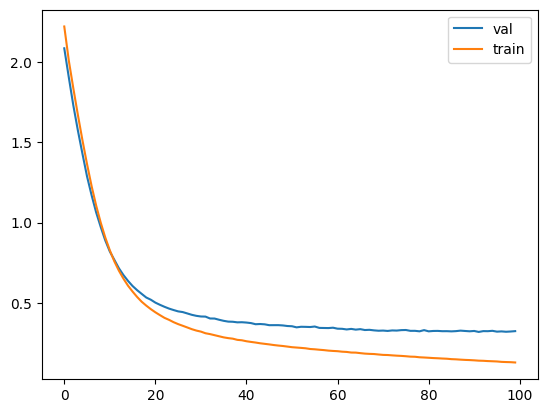

In [17]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

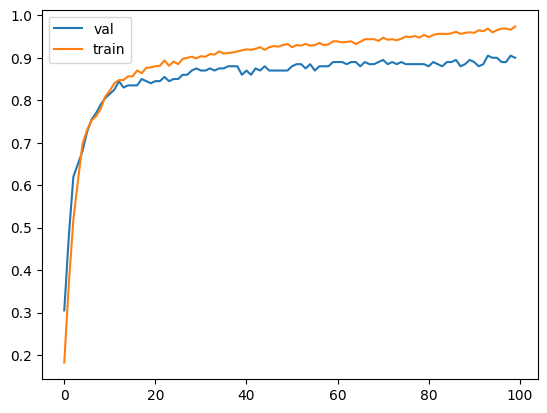

In [18]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [19]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9100

Testing loss: 0.26, acc: 0.91%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [20]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [21]:
predicted_classes = np.argmax(predicted, axis=1)

In [22]:

print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 5 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 2 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 3 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 2 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 3 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 0 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


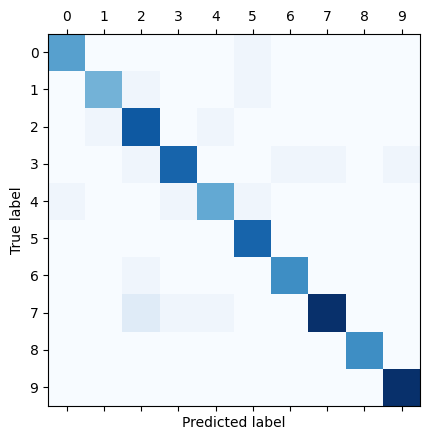

In [23]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [15]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_dim=25))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               2600      
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 43,910
Trainable params: 43,910
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
history2 = model2.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 40ms/step - loss: 1.8429 - accuracy: 0.5263 - val_loss: 1.2786 - val_accuracy: 0.6950
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.9817 - accuracy: 0.7850 - val_loss: 0.7865 - val_accuracy: 0.7900
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.6356 - accuracy: 0.8400 - val_loss: 0.6880 - val_accuracy: 0.7950
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4895 - accuracy: 0.8637 - val_loss: 0.5577 - val_accuracy: 0.8550
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4103 - accuracy: 0.8813 - val_loss: 0.5125 - val_accuracy: 0.8400
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3415 - accuracy: 0.8900 - val_loss: 0.4223 - val_accuracy: 0.8700
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3056 - accuracy: 0.8988 - val_loss: 0.4235 - val_accuracy: 0.8850
Epoch 

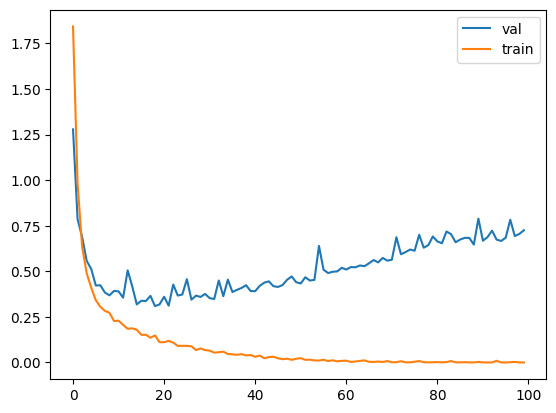

In [21]:
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.legend(['val', 'train'])

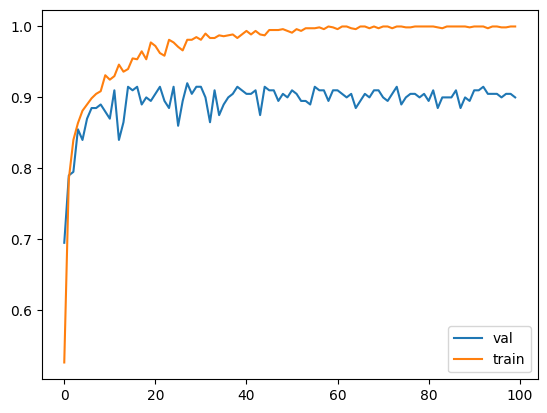

In [22]:
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.legend(['val', 'train'])

In [23]:
from keras.layers import Dropout

In [25]:
model3 = Sequential()
model3.add(Dense(100, activation='relu', input_dim=25))
model3.add(Dropout(0.2))
model3.add(Dense(200, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

In [26]:
model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
history3 = model3.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 39ms/step - loss: 2.2087 - accuracy: 0.2075 - val_loss: 1.9781 - val_accuracy: 0.5450
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 1.9538 - accuracy: 0.3537 - val_loss: 1.5997 - val_accuracy: 0.7500
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 1.6468 - accuracy: 0.4963 - val_loss: 1.2487 - val_accuracy: 0.7750
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 1.3524 - accuracy: 0.5913 - val_loss: 0.9204 - val_accuracy: 0.8100
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 1.1515 - accuracy: 0.6288 - val_loss: 0.7589 - val_accuracy: 0.8350
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 1.0386 - accuracy: 0.6525 - val_loss: 0.6627 - val_accuracy: 0.8250
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 0.9634 - accuracy: 0.6775 - val_loss: 0.6090 - val_accuracy: 0.8400
Epoch 

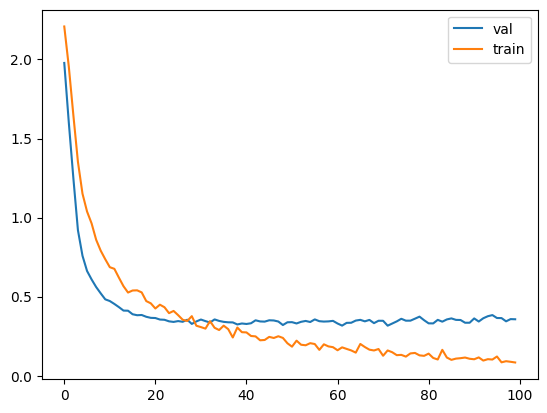

In [28]:
plt.plot(history3.history['val_loss'])
plt.plot(history3.history['loss'])
plt.legend(['val', 'train'])

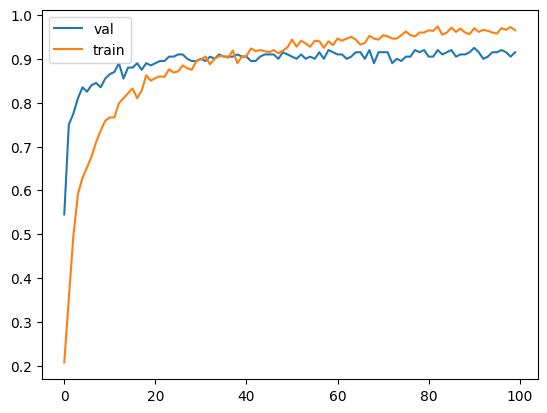

In [29]:
plt.plot(history3.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend(['val', 'train'])